In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import classy
from classy import Class
from classy import CosmoSevereError

In [143]:
params = {'output': 'tCl lCl mPk mTk',
          'l_max_scalars': 2000,
          'lensing': 'yes',
          'modes': 's',
          'A_s': 2.3e-9,
          'n_s': 0.9616,
          'h': 0.7,
          'omega_b': 0.03,
          'omega_cdm': 0.25,
          'gauge': 'newtonian',
          'e_pi': 0.0,
         'z_max_pk': 1000}

cosmo = Class()
cosmo.set(params)
cosmo.compute()



CosmoSevereError: 

Error in Class: Class did not read input parameter(s): e_pi


In [105]:
#pk = cosmo.get_pk_and_k_and_z(nonlinear=False)
weyl = cosmo.get_Weyl_pk_and_k_and_z(nonlinear=False)

<class 'tuple'>


In [99]:
print(weyl[2][31])

0.5335952890833364


In [84]:
print(weyl[1])
print(len(weyl[1]))

[9.33056649e-06 2.01612342e-05 3.10489005e-05 4.20358845e-05
 5.31655375e-05 6.44828003e-05 7.60347854e-05 8.78713959e-05
 1.00045991e-04 1.12616112e-04 1.25644270e-04 1.39198821e-04
 1.53354918e-04 1.68195557e-04 1.83812711e-04 2.00308547e-04
 2.17796701e-04 2.36403573e-04 2.56269581e-04 2.77550271e-04
 3.00417156e-04 3.25058062e-04 3.51676774e-04 3.80491635e-04
 4.11732800e-04 4.45637795e-04 4.82445139e-04 5.22385990e-04
 5.65674033e-04 6.12494268e-04 6.62991747e-04 7.17261654e-04
 7.75342160e-04 8.37211267e-04 9.02788214e-04 9.71939263e-04
 1.04448693e-03 1.12022128e-03 1.19891172e-03 1.28031806e-03
 1.36419986e-03 1.45032376e-03 1.53846862e-03 1.62842876e-03
 1.72001564e-03 1.81305835e-03 1.90740323e-03 2.00291301e-03
 2.09946561e-03 2.19695275e-03 2.29527861e-03 2.39435843e-03
 2.49411730e-03 2.59448897e-03 2.69541480e-03 2.79684284e-03
 2.89872699e-03 3.00102630e-03 3.10370431e-03 3.20672851e-03
 3.31006985e-03 3.41370235e-03 3.51760267e-03 3.62174987e-03
 3.72612510e-03 3.830711

In [87]:
print(weyl[0][0][0])
print(len(weyl[0]))
print(len(weyl[0][0]))

2.1529231874016994e-10
573
46


In [85]:
weyl[0]

array([[2.15292319e-10, 3.25449517e-10, 5.47277427e-10, ...,
        4.93126146e-11, 5.05160642e-11, 5.04657026e-11],
       [6.37609703e-11, 6.26988227e-11, 6.29562103e-11, ...,
        5.00771288e-11, 5.16869093e-11, 5.19811577e-11],
       [7.25551904e-11, 7.26406294e-11, 7.30685590e-11, ...,
        7.15843327e-11, 7.38997842e-11, 7.43399072e-11],
       ...,
       [1.28578810e-10, 1.30078799e-10, 1.31696481e-10, ...,
        1.52236676e-10, 1.57259723e-10, 1.58294262e-10],
       [8.79427526e-11, 8.89686851e-11, 9.00751155e-11, ...,
        1.04123787e-10, 1.07559350e-10, 1.08266933e-10],
       [5.39393174e-11, 5.45685686e-11, 5.52471929e-11, ...,
        6.38638734e-11, 6.59710609e-11, 6.64050541e-11]])

In [108]:
pk = cosmo.get_pk_and_k_and_z(nonlinear=False)

In [113]:
print(pk[2][31])

0.5335952890833364


In [141]:
factor_45= pk[0][1][45]/weyl[0][1][45]
factor_31= pk[0][2][31]/weyl[0][2][31]

In [135]:
print(type(factor_45))
print(factor_45)
print(pk[0][0][45]/weyl[0][0][45])

<class 'numpy.float64'>
3106740428683.3647
1475435794832.296


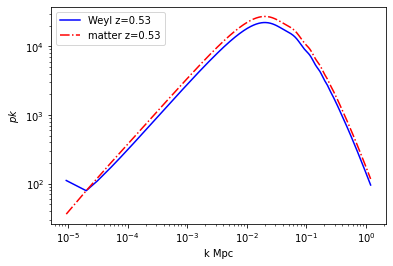

In [140]:
fig = plt.figure()
#plt.loglog([weyl[1][dd] for dd in range(0,573)], [factor_45*weyl[0][dd][45] for dd in range(0,573)],'b-', label=r'Weyl z=0.0')
#plt.loglog([pk[1][dd] for dd in range(0,573)], [pk[0][dd][45] for dd in range(0,573)], 'r-.', label=r'matter z=0.0')
plt.loglog([weyl[1][dd] for dd in range(0,573)], [factor_31*weyl[0][dd][31] for dd in range(0,573)], 'b-',label=r'Weyl z=0.53')
plt.loglog([pk[1][dd] for dd in range(0,573)], [pk[0][dd][31] for dd in range(0,573)], 'r-.', label=r'matter z=0.53')

plt.xlabel('k Mpc')
plt.ylabel(r'$pk$')
plt.legend()